In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/YoselynR/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County.

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

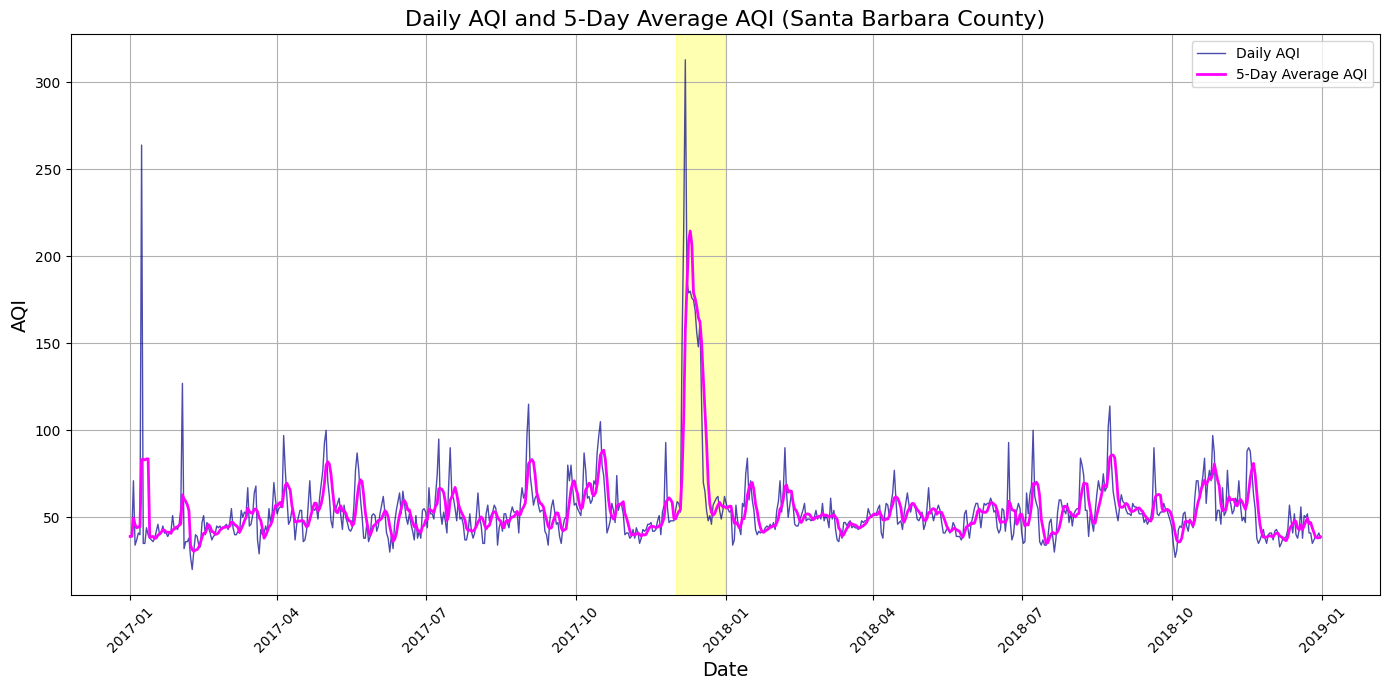

In [50]:
import pandas as pd
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')
aqi_17_head = aqi_17.head()
aqi_18_head = aqi_18.head()
aqi = pd.concat([aqi_17, aqi_18])
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']
aqi_sb = aqi_sb[['date', 'aqi', 'category', 'defining_parameter', 'defining_site', 'number_of_sites_reporting']]
date_type = aqi_sb['date'].dtype
aqi_sb.date = pd.to_datetime(aqi_sb.date)
aqi_sb = aqi_sb.set_index('date')
aqi_sb = aqi_sb.sort_index()
rolling_average = aqi_sb['aqi'].rolling(window='5D').mean()
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling(window='5D').mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='darkblue', linewidth=1, alpha=0.7)
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average AQI', color='fuchsia', linewidth=2)
plt.title('Daily AQI and 5-Day Average AQI (Santa Barbara County)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xticks(rotation=45)  
plt.legend()
plt.grid()
plt.axvspan(pd.Timestamp('2017-12-01'), pd.Timestamp('2017-12-31'), color='yellow', alpha=0.3)
plt.tight_layout()
plt.show()

## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [34]:
import pandas as pd
# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip') # Read in 2017 data from url
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip') # Read in 2018 data from url

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [35]:
# a.
aqi_17_head = aqi_17.head() # Save first 5 rows
print(aqi_17_head) # Print saved rows

  State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2017-01-01   28     Good   
1    Alabama     Baldwin           1            3  2017-01-04   29     Good   
2    Alabama     Baldwin           1            3  2017-01-10   25     Good   
3    Alabama     Baldwin           1            3  2017-01-13   40     Good   
4    Alabama     Baldwin           1            3  2017-01-16   22     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


In [36]:
# b.
aqi_18_head = aqi_18.head() # Save first 5 rows
print(aqi_18_head) # Print saved rows

  State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2018-01-02   42     Good   
1    Alabama     Baldwin           1            3  2018-01-05   45     Good   
2    Alabama     Baldwin           1            3  2018-01-08   20     Good   
3    Alabama     Baldwin           1            3  2018-01-11   25     Good   
4    Alabama     Baldwin           1            3  2018-01-14   33     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [37]:
print(aqi_17.info()) # Print class, number of rows, columns data types and names
print(aqi_17.isnull().sum()) # Print sum of missing values per column
print(aqi_17.nunique()) # Print number of unique values
print(aqi_17.columns) # Print column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB
None
State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI   

In [38]:
print(aqi_18.info()) # Print class, number of rows, columns data types and names
print(aqi_18.isnull().sum()) # Print sum of missing values per column
print(aqi_18.nunique()) # Print number of unique values
print(aqi_18.columns) # Print column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327541 entries, 0 to 327540
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 327541 non-null  object
 1   county Name                327541 non-null  object
 2   State Code                 327541 non-null  int64 
 3   County Code                327541 non-null  int64 
 4   Date                       327541 non-null  object
 5   AQI                        327541 non-null  int64 
 6   Category                   327541 non-null  object
 7   Defining Parameter         327541 non-null  object
 8   Defining Site              327541 non-null  object
 9   Number of Sites Reporting  327541 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 25.0+ MB
None
State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI   

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

The exploration I decided to do was because I find it useful to know the column names, how many rows there are, column types, the number of missing values, and unique values per column. Knowing the column names are useful for different reasons but most importanly for me is knowing the right spelling. Knowing the number of rows is useful because the data could be small or large, this is the index and it can give an idea on how to handle the data. Knowing the column types is useful when needing to make changes to the dataframe or when using specific methods and functions. The number of missing values is useful because sometimes there are more NAs than expected which can cause issues. Knowing the unique values per column is useful to help identify how many different entry options are given in a particular column. This method is sensitive to whitespace, lettercase, and so it is necessary to explore further if needed.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [39]:
aqi = pd.concat([aqi_17, aqi_18]) # Save combined datasets (2017 and 2018)
aqi # Look at combined data

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [40]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [41]:
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara'] # Save filtered (Santa Barbara) data 
aqi_sb = aqi_sb[['date', 'aqi', 'category', 'defining_parameter', 'defining_site', 'number_of_sites_reporting']] # Keep only specific columns (date, aqi, category, defining_parameter, defining_site, and number_of_sites_reporting)
aqi_sb # Look at saved filtered data
# I could have removed columns with .drop as well

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,41,Good,PM2.5,06-083-1008,12


<!-- END QUESTION -->

 
c. What is the data type of the `date` column? Store your answer in the `date_type` variable. Your answer should contain the type for the **date column only**. 

In [42]:
date_type = aqi_sb['date'].dtype # Save type of column date
print(date_type) # Print saved type

object


<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [43]:
aqi_sb.date = pd.to_datetime(aqi_sb.date) # Convert specific object column (date) to datetime object
aqi_sb = aqi_sb.set_index('date') # Save with new (date) index
aqi_sb # Look at saved data

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,39,Good,PM2.5,06-083-2011,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11
2018-12-28,39,Good,Ozone,06-083-1021,12
2018-12-29,39,Good,Ozone,06-083-1021,12


<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [47]:
# Calculate AQI rolling average over 5 days
aqi_sb = aqi_sb.sort_index() # Make sure index is sorted (I recieved an error before but it may not actually be needed afterall)
rolling_average = aqi_sb['aqi'].rolling(window='5D').mean() # Save 5 day window mean for specific column (aqi)
print(rolling_average) # Print saved 5 day window mean

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64


## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [48]:
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling(window='5D').mean() # Add new 5 day mean column to data (Santa Barbara)
print(aqi_sb.columns) # Print columns and verify column is succesfully added

Index(['aqi', 'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting', 'five_day_average'],
      dtype='object')


<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

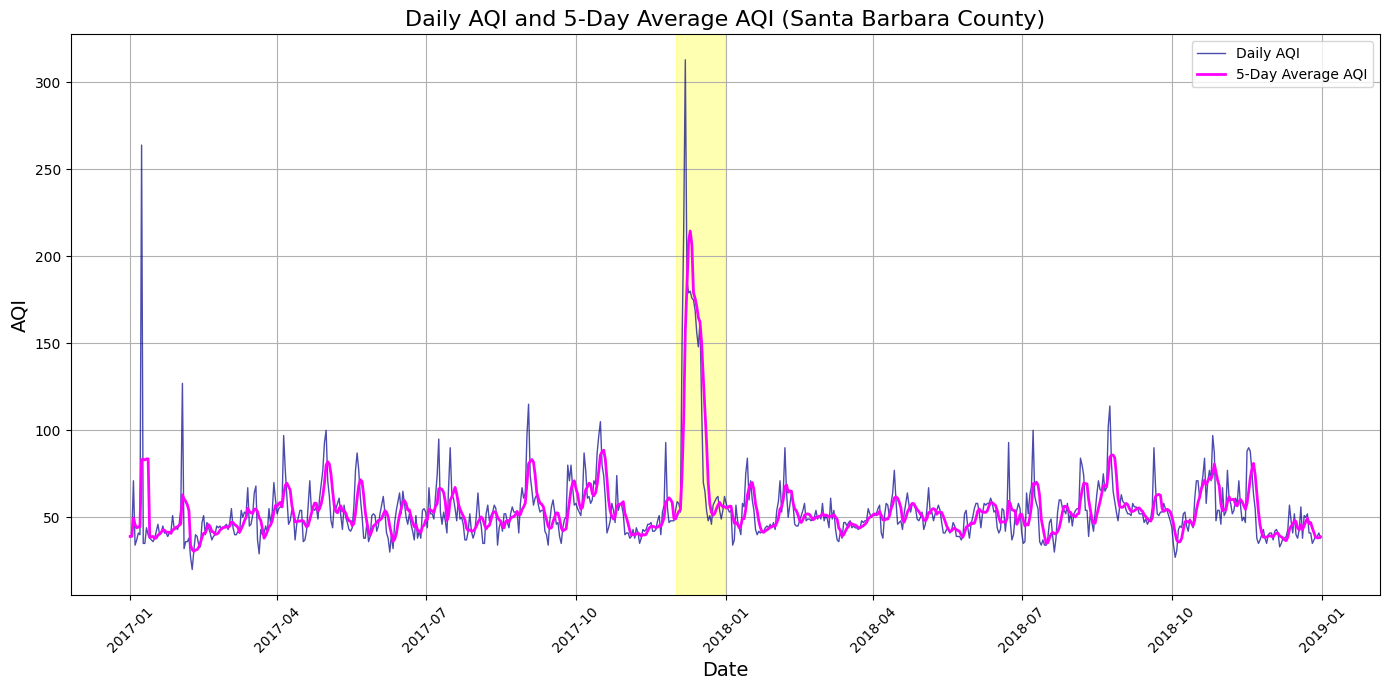

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7)) # Plot figure

plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='darkblue', linewidth=1, alpha=0.7) # Plot aqi , label, color, size, and transparency
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average AQI', color='fuchsia', linewidth=2) # Plot average, label, color, and size

plt.title('Daily AQI and 5-Day Average AQI (Santa Barbara County)', fontsize=16) # Title and size
plt.xlabel('Date', fontsize=14) # X label and size
plt.ylabel('AQI', fontsize=14) # Y label and size
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend() # Legend
plt.grid() # Grid

plt.axvspan(pd.Timestamp('2017-12-01'), pd.Timestamp('2017-12-31'), color='yellow', alpha=0.3) # Add shaded area for Thomas fire

plt.tight_layout() # Layout
plt.show() # Show plot

The Thomas fire does show a spike in the aqi daily and 5 day average. I've highlighted the month of December to clarify the spike occurence. It is clear that the daily aqi was much higher than the 5 day average but it does remain high for a while. The daily aqi dropped from the highest point to where the average remained. For atleast half of the month of December the daily aqi and the 5 day average were above 150. 

## 10

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).